#  OffFaultDeformation getting started - colab version

### Author: M. Ravasi

Welcome to the first **KAUST Hackathon in Geoscience** and congratulations for being one of the selected partecipants!

This notebook is intended to serve as a starting point for the SeismicHunt project.

**Project description:**

As faults accumulate slip they deform their surroundings. This is important for petrophysical reservoir models for reservoirs with faults. Triangular dislocation method can solve the strain accumulated on the surrounding rock for an arbitrary roughness, length (slip) and orientation of faults. Our in-house MATLAB code (a physics-based model) can solve the strain for different roughness parameters of the fault, which can be computationally expensive based on meshing size preferences. The data-set we provide you is 1000 randomly generated strain influence matrix for the same fault and slip amount with changing roughness parameters of fault surface. Data includes coordinates of observation points and strain components of deformation on those observation points. We ask you to provide us with a fast and accurate proxy model using machine learning methods.

**Dataset**:

We have created for you ...

**Getting started**

First of all, you will need to access the dataset. If you are working on your machine, simply head [here](https://drive.google.com/drive/folders/1P1lVMfb-lcC205rs4Pxw8v_8hlUTAqWZ?usp=sharing), download the dataset and place it in the `datasets` folder. 

In the following we provide a number of routines to load and visualize the training data (both input and labels) that you may find useful along the way to investigate the data as well as evaluate your predictions.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import glob
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io as sp_io

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
datapath = '/content/gdrive/MyDrive/OffFaultDef/'

Mounted at /content/gdrive


## Labelled data

In [3]:
np.random.seed(5)

dtrain = sp_io.loadmat(datapath+'MLtrain.mat')
dtest = sp_io.loadmat(datapath+'MLtest.mat')

In [4]:
# Input
dtrain = dtrain['Data2']
C = dtrain[0][0][0].squeeze()
H_stk = dtrain[0][0][1].squeeze()
H_dip = dtrain[0][0][2].squeeze()

# Target
strbulk = dtrain[0][0][3].squeeze()

# Plotting
ObsE = dtrain[0][0][4].squeeze()
ObsN = dtrain[0][0][5].squeeze()

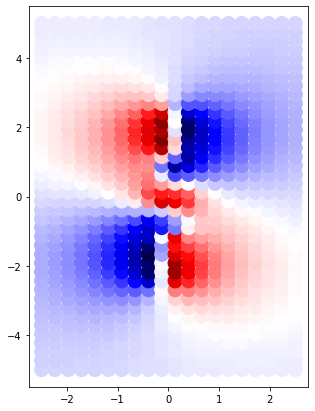

In [5]:
plt.figure(figsize=(5, 7))
plt.scatter(ObsE, ObsN, c=strbulk[:, 0], s=200, cmap='seismic');

## Unlabelled data

In [6]:
# Input
dtest = dtest['Data']
C = dtest[0][0][0].squeeze()
H_stk = dtest[0][0][1].squeeze()
H_dip = dtest[0][0][2].squeeze()

# Plotting
ObsE = dtest[0][0][4].squeeze()
ObsN = dtest[0][0][5].squeeze()